<a href="https://colab.research.google.com/github/BiancadeFrancisco/Analise_Financeira.bitcoin/blob/main/criptomoedas_yahoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# INSTALAR PACOTES, MERCADO FINANCEIRO B3

!pip install yfinance --upgrade --no-cache-dir  #yfinance, é uma API do site yahoo, que disponibiliza dados atualizados do mercado financeiro


In [2]:
# bibliotecas de modelagem de dados:

import pandas as pd
import numpy as np
import pandas_datareader.data as web

# bibliotecas análises gráficas:

import matplotlib.pyplot as plt
import seaborn as sns

# biblioteca análises gráficas robustas:

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# biblioteca para data:

import datetime

# Yahoo Finance

import yfinance as yf
yf.pdr_override() # args personalizados

#API Yahoo Finance:
O yfinance oferece uma maneira segmentada e Pythonic de baixar dados de mercado do Yahoo!R finanças.


In [3]:
# ESPECIFICAR O SÍMBOLO DA AÇÃO E O PERÍODO DE TEMPÓ DESEJADO:

Simbolo = 'BTC-USD'

# 1° opção:
Inicio = '2021-11-08'
Fim = '2023-11-08'

# 2° opção:
Periodo = '6mo'


In [4]:
# COletando dados, 1° opção:

Dados1 = web.get_data_yahoo(Simbolo, start = Inicio, end = Fim)  # get_data_yahoo = API = programa que envia e recebe informações entre um site ou aplicação e os seus utilizadores.

Dados1.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-08,63344.066406,67673.742188,63344.066406,67566.828125,67566.828125,41125608330
2021-11-09,67549.734375,68530.335938,66382.062500,66971.828125,66971.828125,42357991721
2021-11-10,66953.335938,68789.625000,63208.113281,64995.230469,64995.230469,48730828378
2021-11-11,64978.890625,65579.015625,64180.488281,64949.960938,64949.960938,35880633236
2021-11-12,64863.980469,65460.816406,62333.914062,64155.941406,64155.941406,36084893887


In [5]:
# COletando dados, 2° opção:

Dados2 = web.get_data_yahoo(Simbolo, period = Periodo)  # get_data_yahoo = API = programa que envia e recebe informações entre um site ou aplicação e os seus utilizadores.

Dados2.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-08,28450.457031,28663.271484,27310.134766,27694.273438,27694.273438,19122903752
2023-05-09,27695.068359,27821.400391,27375.601562,27658.775391,27658.775391,14128593256
2023-05-10,27654.636719,28322.687500,26883.669922,27621.755859,27621.755859,20656025026
2023-05-11,27621.085938,27621.941406,26781.826172,27000.789062,27000.789062,16724343943
2023-05-12,26987.662109,27055.646484,25878.429688,26804.990234,26804.990234,19313599897


In [6]:
# Tipo de Informação:
type(Dados2)

# DataFrame = planilha que podemos manipular após importar da API, através do Pandas

pandas.core.frame.DataFrame

In [7]:
# Ultimos 10 registros:

Dados2.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-30,34531.742188,34843.933594,34110.972656,34502.363281,34502.363281,17184860315
2023-10-31,34500.078125,34719.253906,34083.308594,34667.781250,34667.781250,15758270810
2023-11-01,34657.273438,35527.929688,34170.691406,35437.253906,35437.253906,22446272005
2023-11-02,35441.578125,35919.843750,34401.574219,34938.242188,34938.242188,20998158544
2023-11-03,34942.472656,34942.472656,34133.441406,34732.324219,34732.324219,17158456701
2023-11-04,34736.324219,35256.031250,34616.691406,35082.195312,35082.195312,9561294264
2023-11-05,35090.011719,35340.339844,34594.242188,35049.355469,35049.355469,12412743996
2023-11-06,35044.789062,35286.027344,34765.363281,35037.371094,35037.371094,12693436420
2023-11-07,35047.792969,35892.417969,34545.816406,35443.562500,35443.562500,18834737789


In [8]:
# Estatisticas Descritivas:

Dados2.describe()

# 50% = mediada = valor do centro
# se média (mean) for próxima da mediana (50%), você tem uma distribuição normal dos dados

,Open,High,Low,Close,Adj Close,Volume
count,185.000000,185.000000,185.000000,185.000000,185.000000,1.850000e+02
mean,28458.823459,28854.602460,28109.855880,28496.012500,28496.012500,1.392519e+10
std,2469.389398,2556.998545,2460.898562,2519.914904,2519.914904,5.786715e+09
min,25121.673828,25735.308594,24797.167969,25124.675781,25124.675781,5.331173e+09
25%,26564.056641,26888.882812,26240.701172,26567.632812,26567.632812,1.044652e+10
50%,27654.636719,28047.238281,27215.552734,27658.775391,27658.775391,1.282699e+10
75%,29907.998047,30233.656250,29664.121094,29912.281250,29912.281250,1.583738e+10
max,35441.578125,35919.843750,35193.121094,35443.562500,35443.562500,4.493500e+10


In [9]:
# Informações?

Dados2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185 entries, 2023-05-08 to 2023-11-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       185 non-null    float64
 1   High       185 non-null    float64
 2   Low        185 non-null    float64
 3   Close      185 non-null    float64
 4   Adj Close  185 non-null    float64
 5   Volume     185 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 10.1 KB


#Média Móvel:

Usado para visualizar tendências, é um indicador que faz parte da Análise Técnica de ações. Com ela, é possível identificar o equilibrio dos preços do mercado, obsevando tendências de alta, neutra ou baixa. A representação gráfica das médias móveis é normalmente feita por uma linha, que se movimenta conforme os dados novos recebidos para o cálculo.

MMA = soma dos preços de fechamento / n° de dias

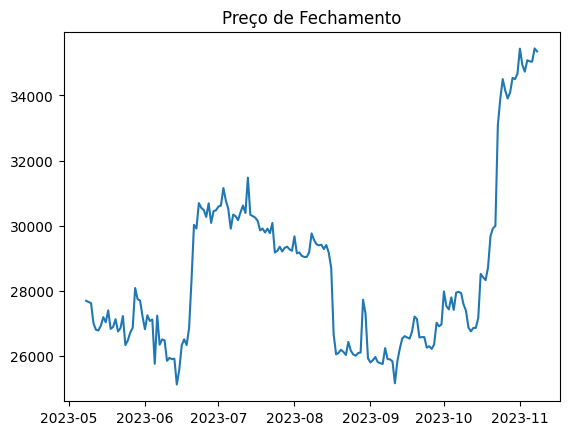

In [10]:
# PLOTAR GRÁFICO LINHAS:

plt.plot(Dados2['Close'])
plt.title('Preço de Fechamento');

**Função rolling**

A função rolling() é uma função do pandas que permite calcular estatísticas em janelas deslizantes de dados. <br>
Ela é muito útil para calcular médias móveis, desvios padrão, somatórios, mínimos e máximos, entre outras estatísticas.

In [11]:
Periodo = 5
Dados2['Close'].rolling(window = Periodo).mean()

Date
2023-05-08             NaN
2023-05-09             NaN
2023-05-10             NaN
2023-05-11             NaN
2023-05-12    27356.116797
                  ...     
2023-11-04    34971.559375
2023-11-05    35047.874219
2023-11-06    34967.897656
2023-11-07    35068.961719
2023-11-08    35193.028125
Name: Close, Length: 185, dtype: float64

<ipython-input-12-064ad6937014>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


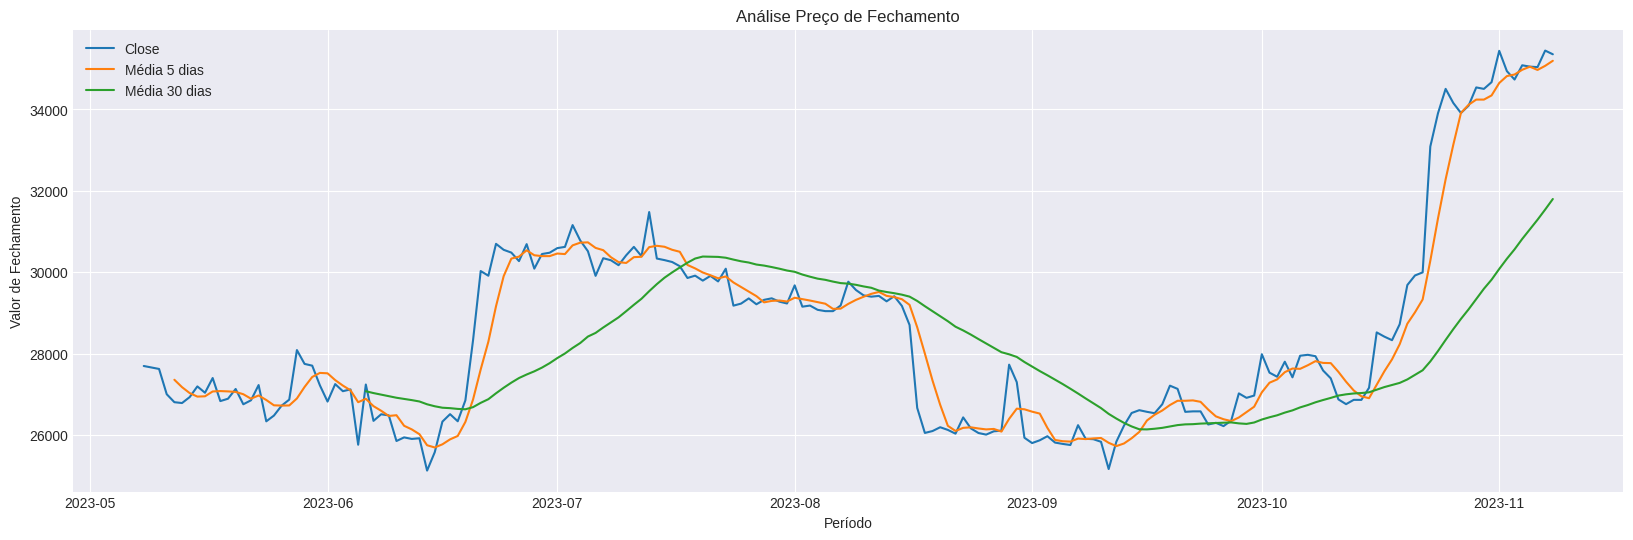

In [12]:
# PLOTAR GRÁFICO LINHAS COM MÉDIA MÓVEL:

# Estilo
plt.style.use('seaborn-darkgrid')

# Tamanho
plt.figure(figsize=(20,6))

# Plots
plt.plot(Dados2['Close'])
plt.plot(Dados2['Close'].rolling(window = Periodo).mean()) # MÉDIA MÓVEL DE 5 DIAS
plt.plot(Dados2['Close'].rolling(window = Periodo + 25).mean()) # MÉDIA MÓVEL DE 30 DIAS

# Legenda
plt.legend(['Close', 'Média 5 dias', 'Média 30 dias'])

# Labels
plt.ylabel('Valor de Fechamento')
plt.xlabel('Período');

# Título
plt.title('Análise Preço de Fechamento');

#PLOTLY
O PLOTLY é uma biblioteca Python de plotagem interativa e de código aberto que oferece suporte a mais de 40 tipos de gráficos exclusivos, abrangendo uma ampla variedade de casos de uso estatísticos, financeiros, geográficos, científicos e tridimensionais.

* plotly.express (px) é uma maneira rápida e fácil de criar visualizações dinâmicas de dados.

* plotly.graph_objects (go) é a API de nível inferior que concede mais controle sobre suas visualizações, mas é mais intensiva em código.

In [13]:
Dados2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-08,28450.457031,28663.271484,27310.134766,27694.273438,27694.273438,19122903752
2023-05-09,27695.068359,27821.400391,27375.601562,27658.775391,27658.775391,14128593256
2023-05-10,27654.636719,28322.687500,26883.669922,27621.755859,27621.755859,20656025026
2023-05-11,27621.085938,27621.941406,26781.826172,27000.789062,27000.789062,16724343943
2023-05-12,26987.662109,27055.646484,25878.429688,26804.990234,26804.990234,19313599897


In [14]:
# ACRESCENTAR COLUNA DE MÉDIA MÓVEL:

Periodo = 5
Dados2['Media_Movel'] = Dados2['Close'].rolling(window = Periodo).mean()

Dados2.head()

,Open,High,Low,Close,Adj Close,Volume,Media_Movel
Date,,,,,,,
2023-05-08,28450.457031,28663.271484,27310.134766,27694.273438,27694.273438,19122903752,NaN
2023-05-09,27695.068359,27821.400391,27375.601562,27658.775391,27658.775391,14128593256,NaN
2023-05-10,27654.636719,28322.687500,26883.669922,27621.755859,27621.755859,20656025026,NaN
2023-05-11,27621.085938,27621.941406,26781.826172,27000.789062,27000.789062,16724343943,NaN
2023-05-12,26987.662109,27055.646484,25878.429688,26804.990234,26804.990234,19313599897,27356.116797


In [15]:
# GRÁFICO USANDO PX (express):

px.line(Dados2, y = 'Close', title = 'Fechamento')


In [16]:
# GRÁFICO USANDO GO:

Figure_02 = go.Figure(
    data=go.Scatter(
        x=Dados2.index,
        y=Dados2['Close'],
        line=( dict(color='firebrick', width=3) )
    )
)

Figure_02.update_layout(
    title='Análise de Fechamento',
    xaxis_title='Periodo',
    yaxis_title='Preço de Fechamento'
)

Figure_02.show()

In [17]:
# GRÁFICO DE ÁREA MAIS COMPLEXO (área preenchida):

Area = px.area(
    data_frame=Dados2.reset_index(),
    y='Close', x='Date',
    title=f'{Simbolo}'
)

# Atualiza as configurações dos eixos x (datas) do gráfico
Area.update_xaxes(
    title_text='Data',
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1M', step='month', stepmode='backward'),
            dict(count=6, label='6M', step='month', stepmode='backward'),
            dict(count=1, label='1Y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)

# Ajustano o eixo Y
Area.update_yaxes( title_text='Preço em USD', ticksuffix='$')

# Ajustar o titulo
Area.update_layout(
    showlegend=True,
    title={
        'text': f'{Simbolo} ({Dados2.index.min().year}-Presente)',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
      },
      template="plotly_white"
    )

Area

#Candlestick Charts

É um estilo de gráfico financeiro que descreve abertura, alta, baixa e fechamento para uma determinada xcoordenada (tempo mais provável). As caixas representam a dispersão entre os valores opene closee as linhas representam a dispersão entre os valores lowe high. Pontos de amostragem onde o valor de fechamento é maior (inferior) do que o valor de abertura são chamados de crescentes (decrescentes). Por padrão, as velas crescentes são desenhadas em verde, enquanto as decrescentes são desenhadas em vermelho.

In [26]:
# Grafico clandestik (GO)

Grafico_Candlestick = go.Figure(
    data=[
        go.Candlestick(
            x=Dados2.index,
            open=Dados2['Open'],
            high=Dados2['High'],
            low=Dados2['Low'],
            close=Dados2['Close'],
            #increasing_line_color='cyan',
            #decreasing_line_color='gray'
        )
    ]
)

Grafico_Candlestick.update_layout(
    xaxis_rangeslider_visible=False,
    title='Análise Fechamento',
    xaxis_title='Periodo',
    yaxis_title='Preço de Fechamento'
)

Grafico_Candlestick.show()

In [21]:
# Construção do Relatorio

Relatorio = make_subplots(
    rows=2,
    cols=1,
    specs=[
        [ {'type':'scatter'} ],
        [ {'type':'scatter'} ],
    ],
    subplot_titles=('Cotação', 'Fechamento'),
    # Compartilhar mesmo eixo x
    shared_xaxes=True,
    # Largura da vertical
    vertical_spacing=0.075

)

# Ajuste do Layout
Relatorio.update_layout(
    # Dimensao
    width=1000, height=800,

    # Titulo no relatorio
    title_text='<b>Data Analytics</b> <br>Cotação do Bitcoin',

    # Estilo
    template='plotly_dark',

    # Ajuste de layout gráficos
    paper_bgcolor='rgb(0, 0, 0)',
    plot_bgcolor='rgb(10, 10, 10)',

    # Fonte do texto
    font=dict(color='white')
)

# Colocando um grafico na 1º Linha
Relatorio.add_trace(
    go.Candlestick(
        x=Dados2.index,
        open=Dados2['Open'],
        high=Dados2['High'],
        low=Dados2['Low'],
        close=Dados2['Close'],
        #increasing_line_color='cyan',
        #decreasing_line_color='gray'
    ), row=1, col=1
)

# Retirando a barra visivel
Relatorio.update_layout(
    xaxis_rangeslider_visible=False
)

# Adicionado um gráfico na 2º Posição
Relatorio.add_trace(
    go.Scatter(
        x=Dados2.index,
        y=Dados2['Close'],
        mode='lines',
        name='Fechamento',
        line=dict(color='green')
    ),
    row=2, col=1
)

Relatorio.add_trace(
    go.Scatter(
        x=Dados2.index,
        y=Dados2['Media_Movel'],
        mode='lines',
        name='Média Móvel',
        line=dict(color='rgb(158, 58, 171)')
    ),
    row=2, col=1
)

# Ajuste
Relatorio.update_layout(
    legend=dict(
        # Posição
        orientation='h',

        # Eixo X e Y
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1,
        font=dict( size=9)
    )
)

# Acionar texto
Relatorio.add_annotation(
    # Seta (desativada)
    showarrow=False,
    # Texto
    text='Análise feita no evento de IMERSÃO EM DADOS',
    # Tamanho
    font=dict(size=12),

    # Aponta as direções do texto
    xref='x domain',
    x=1,
    yref='y domain',
    y=-1.4
)

Relatorio.add_annotation(
    showarrow=False,
    text='By: Bianca de Francisco Zanettin',
    font=dict(size=10),

     # Aponta as direções do texto
    xref='x domain',
    x=0,
    yref='y domain',
    y=-1.4
)

Relatorio

## **Exportando PDF**

**Kaleido**

Kaleido é uma biblioteca de plataforma cruzada para geração de imagens estáticas (por exemplo, png, svg, pdf, etc.) para bibliotecas de visualização baseadas na web, com foco particular na eliminação de dependências externas. O foco inicial do projeto é a exportação de imagens plotly.js do Python para uso por plotly.py, mas ele foi projetado para ser relativamente direto para estender a outras bibliotecas de visualização baseadas na web e outras linguagens de programação. O foco principal do Kaleido (pelo menos inicialmente) é servir como uma dependência de bibliotecas de visualização baseadas na web, como plotly.py. Como tal, o foco está em fornecer uma API programática, em vez de amigável ao usuário.

In [24]:
# Reiniciei o servidor
!pip install -U kaleido

In [22]:
Relatorio.write_image('Report_Financeiro.pdf')